In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("data.csv")
group_stats = pd.read_csv("group_stats.csv")

Now we should filter the columns of interest.

For Data:

- match
- home_team
- away_team
- score

For Group Stats:

- group
- team

In [3]:
data_filter = data[['match', 'home_team', 'away_team', 'score']]
data_filter

,match,home_team,away_team,score
0,1,Qatar,Ecuador,0-2
1,2,England,IR Iran,6-2
2,3,Senegal,Netherlands,0-2
3,4,United States,Wales,1-1
4,5,Argentina,Saudi Arabia,1-2
...,...,...,...,...
59,60,England,France,1-2
60,61,Argentina,Croatia,3-0
61,62,France,Morocco,2-0
62,63,Croatia,Morocco,2-1


In [4]:
group_stats_filter = group_stats[['group', 'team']]
group_stats_filter

,group,team
0,1,Netherlands
1,1,Senegal
2,1,Ecuador
3,1,Qatar
4,2,England
5,2,United States
6,2,IR Iran
7,2,Wales
8,3,Argentina
9,3,Poland


Shape

In [5]:
print("Data shape:", data_filter.shape)
print("Group Stats shape:", group_stats_filter.shape)

Data shape: (64, 4)
Group Stats shape: (32, 2)


Columns and Data Types of each one of them.

In [6]:
data_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   match      64 non-null     int64 
 1   home_team  64 non-null     object
 2   away_team  64 non-null     object
 3   score      64 non-null     object
dtypes: int64(1), object(3)
memory usage: 2.1+ KB


In [7]:
group_stats_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   group   32 non-null     int64 
 1   team    32 non-null     object
dtypes: int64(1), object(1)
memory usage: 640.0+ bytes


Extractor de Goles

Haga una función que reciba un string que contenga la información de los goles de un partido (por ejemplo un empate de 1 a 1, con resultado de penales de 1 a 3, sería el string "(1) 1-1 (3)") y devuelva 4 valores (atención a qué tipo de dato deberían ser estos cuatro valores):

- goles home: cantidad de goles del equipo "home"
- goles away: cantidad de goles del equipo "away"
- penales home: cantidad de penales del equipo "home". En caso de no haber penales debe ser 0.
- penales away: cantidad de penales del equipo "away". En caso de no haber penales debe ser 0


In [ ]:
import re

In [8]:
def extract_wo_penalties(result):
    goles_home, goles_away = result.split('-')   
    penales_home = 0
    penales_away = 0
    return int(goles_home), int(goles_away), penales_home, penales_away 

In [10]:
def extract_penalties(result):
    penalties = re.findall(r'\((\d+)\)', result)
    goals = re.findall(r'\d+', result)
    
    penales_home = int(penalties[0])
    penales_away = int(penalties[1])
    goles_home = int(goals[1])
    goles_away = int(goals[2])

    return goles_home, goles_away, penales_home, penales_away

In [11]:
def goals_extractor(result: str) -> tuple:
    
    if len(result) > 3:
        output = extract_penalties(result)
    else:
        output = extract_wo_penalties(result)

    return output

In [12]:
#Example of input of the function
res_wo_pen = data_filter["score"][0]
res_pen = data_filter["score"][63]

print(res_wo_pen)
print(res_pen)

0-2
(4) 3-3 (2)


In [13]:
goals_extracted   =  goals_extractor(res_wo_pen)
goals_extracted_0 =  goals_extractor(res_pen)

print(goals_extracted )
print(goals_extracted_0)

(0, 2, 0, 0)
(3, 3, 4, 2)


The order is goles_home, goles_away, penales_home, penales_away


Haga una función que reciba el nombre de un archivo (Puede usar "datos.csv" como prueba, pero al abrir el archivo deberá agregar encoding='utf8' para poder leer texto con tildes) y devuelva un diccionario. En este diccionario, cada llave será el nombre de un país, y el valor asociado a cada una será otro diccionario. Cada uno de estos diccionarios debe tener la información de los goles totales convertidos por el país a lo largo de todo mundial, puntos obtenidos en la fase de grupos, y ranking final.

Donde p0 es el puntaje al principio de la fase de grupos (todos 0), p1 el puntaje después del primer partido, p2 del segundo y p3 del tercero. Para calcular estos puntajes deberá utilizar la información de los partidos del archivo, pero tenga en cuenta que el archivo contiene información de los partidos que vienen luego de la fase de grupos. Considere que:

- Partido ganado = +3 puntos
- Partido perdido = +0 puntos 
- Partido empatado = +1 punto

El ranking final será simplemente un valor numérico que indica la posición final del país en el mundial, la cual vale 1, 2, 3 o 4 para los equipos que quedaron en los primeros cuatro puestos, y el valor 0 en cualquier otro caso (fuera del podio, no hay un orden de posiciones).

I am going to pass directly the df, as I have already "bring" that file. The main function is file_to_dict().

In [14]:
def get_goals(data):

    #Generate goal columns
    for i, column in data.iterrows():
        #Generate two new columns with the away and home goals
        score = data.loc[i, 'score']
        goles_home, goles_away, penales_home, penales_away =  goals_extractor(score)
        data.loc[i, "home_goal"] = goles_home + penales_home
        data.loc[i, "away_goal"] = goles_away + penales_away

    #Generate goal dictionaries per team
    goals_dict = {}

    # Iterate over each row in the DataFrame
    for index, row in data.iterrows():
        home_team = row['home_team']
        away_team = row['away_team']
        home_goals = row['home_goal']
        away_goals = row['away_goal']

        # Update the goal count for home team
        if home_team in goals_dict:
            goals_dict[home_team] += home_goals
        else:
            goals_dict[home_team] = home_goals

        # Update the goal count for away team
        if away_team in goals_dict:
            goals_dict[away_team] += away_goals
        else:
            goals_dict[away_team] = away_goals

    #Generate a df of the goals per team
    new_data = {'team': list(goals_dict.keys()), 'goals': list(goals_dict.values())}
    new_df = pd.DataFrame(new_data)

    return new_df

In [15]:
def calculate_points(goals_for, goals_against):
    if goals_for > goals_against:
        return 3
    elif goals_for == goals_against:
        return 1
    else:
        return 0

In [16]:
def calculate_total_points(data):

    # Filas de interes
    selected_data = data.iloc[:48]

    # Crear un diccionario para almacenar los puntos de cada equipo
    team_points = {}

    # Iterar sobre cada fila del DataFrame
    for index, row in selected_data.iterrows():
        home_team = row['home_team']
        away_team = row['away_team']
        home_goal = row['home_goal']
        away_goal = row['away_goal']

        # Calcular los puntos para el equipo de casa
        if home_team in team_points:
            team_points[home_team] += calculate_points(home_goal, away_goal)
        else:
            team_points[home_team] = calculate_points(home_goal, away_goal)

        # Calcular los puntos para el equipo visitante
        if away_team in team_points:
            team_points[away_team] += calculate_points(away_goal, home_goal)
        else:
            team_points[away_team] = calculate_points(away_goal, home_goal)

    # Convertir el diccionario en un DataFrame
    result_df = pd.DataFrame({'team': list(team_points.keys()), 'points': list(team_points.values())})

    return result_df


In [17]:
def winner_looser(row):
    if row["home_goal"] > row["away_goal"]:
        winner, looser = row["home_team"], row["away_team"]

    return winner, looser

In [18]:
def rankings(data):

    podium_matches = data.iloc[-2:]
    podium = []

    #3rd position
    c, d = winner_looser(podium_matches.loc[62])
    podium.append(d)
    podium.append(c)

    #final
    a, b = winner_looser(podium_matches.loc[63])
    podium.append(b)
    podium.append(a)

    pod_dict = {}
    for i in range(len(podium)):
        pod_dict[str(podium[i])] = len(podium) - i

    # Convert dictionary to dataframe
    df = pd.DataFrame.from_dict(pod_dict, orient='index', columns=['rankings'])

    # Add a column for the keys
    df.reset_index(inplace=True)
    df.columns = ['team', 'rankings']
    
    return df

In [19]:
def file_to_dict(data):

    goals = get_goals(data)
    points = calculate_total_points(data)
    ranks = rankings(data)
    
    #Combine all df into one
    merged_df = pd.merge(goals, points, on="team")

    # Merge the "merged_df" with the "ranks" dataframe based on the "team" column
    final_df = pd.merge(merged_df, ranks, on="team", how="outer").fillna(0)

    # Create an empty dictionary to store the teams
    teams = {}

    # Iterate over each row in the dataframe
    for index, row in final_df.iterrows():
        team_data = {}  # Sub-dictionary for each team
        team_data["goals"] = row["goals"]
        team_data["points"] = row["points"]
        team_data["rankings"] = row["rankings"]
        teams[row["team"]] = team_data
    
    return teams

In [20]:
wc_dict = file_to_dict(data_filter.copy())
wc_dict

{'Qatar': {'goals': 1.0, 'points': 0, 'rankings': 0.0},
 'Ecuador': {'goals': 4.0, 'points': 4, 'rankings': 0.0},
 'England': {'goals': 13.0, 'points': 7, 'rankings': 0.0},
 'IR Iran': {'goals': 4.0, 'points': 3, 'rankings': 0.0},
 'Senegal': {'goals': 5.0, 'points': 6, 'rankings': 0.0},
 'Netherlands': {'goals': 13.0, 'points': 7, 'rankings': 0.0},
 'United States': {'goals': 3.0, 'points': 5, 'rankings': 0.0},
 'Wales': {'goals': 1.0, 'points': 1, 'rankings': 0.0},
 'Argentina': {'goals': 23.0, 'points': 6, 'rankings': 1.0},
 'Saudi Arabia': {'goals': 3.0, 'points': 3, 'rankings': 0.0},
 'Denmark': {'goals': 1.0, 'points': 1, 'rankings': 0.0},
 'Tunisia': {'goals': 1.0, 'points': 4, 'rankings': 0.0},
 'Mexico': {'goals': 2.0, 'points': 4, 'rankings': 0.0},
 'Poland': {'goals': 3.0, 'points': 4, 'rankings': 0.0},
 'France': {'goals': 18.0, 'points': 6, 'rankings': 2.0},
 'Australia': {'goals': 4.0, 'points': 6, 'rankings': 0.0},
 'Morocco': {'goals': 9.0, 'points': 7, 'rankings': 4.0}

Agregar datos

Haga una función que reciba el nombre de un archivo que contenga información de los grupos (use "group_stats.csv" para probar su código) y el diccionario que creo anteriormente, y le agregue a cada país el grupo al cual pertenece agregando otra clave y valor al diccionario de cada país.

In [21]:
def add_data(data, wc_dict):
    
    # Add the group subkey to the data dictionary
    for _, row in data.iterrows():
        team = row['team']
        group = row['group']
        if team in wc_dict:
            wc_dict[team]['group'] = group

    return wc_dict

In [22]:
new_wc_dict = add_data(group_stats_filter.copy(), wc_dict)
new_wc_dict

{'Qatar': {'goals': 1.0, 'points': 0, 'rankings': 0.0, 'group': 1},
 'Ecuador': {'goals': 4.0, 'points': 4, 'rankings': 0.0, 'group': 1},
 'England': {'goals': 13.0, 'points': 7, 'rankings': 0.0, 'group': 2},
 'IR Iran': {'goals': 4.0, 'points': 3, 'rankings': 0.0, 'group': 2},
 'Senegal': {'goals': 5.0, 'points': 6, 'rankings': 0.0, 'group': 1},
 'Netherlands': {'goals': 13.0, 'points': 7, 'rankings': 0.0, 'group': 1},
 'United States': {'goals': 3.0, 'points': 5, 'rankings': 0.0, 'group': 2},
 'Wales': {'goals': 1.0, 'points': 1, 'rankings': 0.0, 'group': 2},
 'Argentina': {'goals': 23.0, 'points': 6, 'rankings': 1.0, 'group': 3},
 'Saudi Arabia': {'goals': 3.0, 'points': 3, 'rankings': 0.0, 'group': 3},
 'Denmark': {'goals': 1.0, 'points': 1, 'rankings': 0.0, 'group': 4},
 'Tunisia': {'goals': 1.0, 'points': 4, 'rankings': 0.0, 'group': 4},
 'Mexico': {'goals': 2.0, 'points': 4, 'rankings': 0.0, 'group': 3},
 'Poland': {'goals': 3.0, 'points': 4, 'rankings': 0.0, 'group': 3},
 'Fran

Listas ordenadas

Hacer una función que tome un diccionario de diccionarios y una llave deseada, y genere dos listas. La primer lista está compuesta por las llaves del diccionario, (en el caso del diccionario que creamos hasta ahora serían los nombres de los países). La segunda lista contiene el valor que guarda cada sub-diccionario para la llave especificada(para el caso del diccionario anterior podría ser "goals" por ejemplo). Ambas listas deben estar ordenadas según los valores de la segunda lista. 

In [23]:
def generate_sorted_lists(dictionary, key):
    # Obtener las claves y valores del subdiccionario especificado por la clave deseada
    values = [subdictionary[key] for subdictionary in dictionary.values()]
    keys = list(dictionary.keys())

    # Ordenar las listas basándose en los valores
    sorted_lists = sorted(zip(values, keys))
    sorted_values, sorted_keys = zip(*sorted_lists)

    return list(sorted_keys), list(sorted_values)

In [24]:
a, b = generate_sorted_lists(new_wc_dict, "goals")

In [25]:
a

['Belgium',
 'Denmark',
 'Qatar',
 'Tunisia',
 'Wales',
 'Canada',
 'Mexico',
 'Uruguay',
 'Costa Rica',
 'Poland',
 'Saudi Arabia',
 'United States',
 'Australia',
 'Cameroon',
 'Ecuador',
 'IR Iran',
 'Ghana',
 'Korea Republic',
 'Senegal',
 'Serbia',
 'Switzerland',
 'Germany',
 'Japan',
 'Morocco',
 'Spain',
 'Brazil',
 'Portugal',
 'England',
 'Netherlands',
 'Croatia',
 'France',
 'Argentina']

In [26]:
b

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 2.0,
 3.0,
 3.0,
 3.0,
 3.0,
 4.0,
 4.0,
 4.0,
 4.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 6.0,
 6.0,
 9.0,
 9.0,
 10.0,
 12.0,
 13.0,
 13.0,
 15.0,
 18.0,
 23.0]

Graficos de Grupos

Haga una función que reciba el diccionario y una lista de grupos y grafique (Una figura por grupo) los puntajes cumulativos de cada equipo en cada grupo indicado. Note que el gráfico tiene una leyenda para saber que equipo es que línea, y que las lineas tienen puntos para cada etapa

In [27]:
import matplotlib.pyplot as plt

In [28]:
def plot_cumulative_scores(data, groups):
    for group in groups:
        plt.figure()
        plt.title(f'Puntajes acumulativos - Grupo {group}')
        
        for team in data:
            if data[team]['group'] == group:
                points = data[team]['points']
                if isinstance(points, int):  # Verifica si 'points' es un entero
                    scores = [0, points]  # Crea una lista con el puntaje acumulativo inicial
                else:
                    scores = [0]
                    for i in range(1, len(points)+1):
                        scores.append(scores[i-1] + points[i-1])
                
                plt.plot(range(len(scores)), scores, label=team, marker='o', linestyle='-')
        
        plt.xlabel('Etapa')
        plt.ylabel('Puntaje acumulativo')
        plt.legend(loc='upper left')
        plt.grid(True)
    
    plt.show()

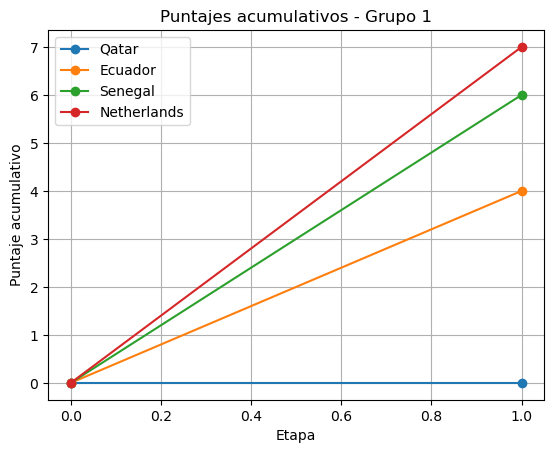

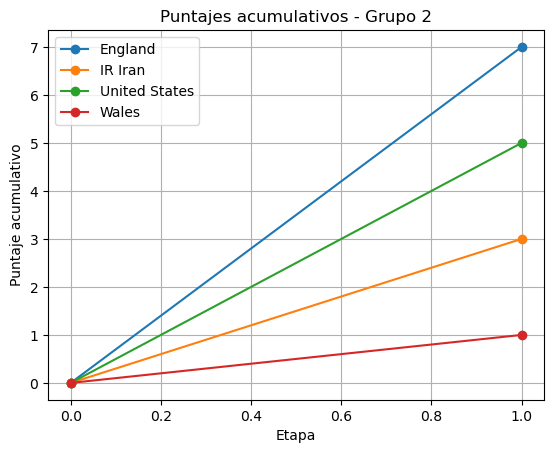

In [29]:
groups = [1, 2]  
plot_cumulative_scores(new_wc_dict, groups)

The error on the plot is a consecuence of the one made on the creation of the way of saving the points

Guardado de datos

Haga una función que guarde el diccionario como un csv, siendo los campos del archivo:

- Team: Nombre del país
- Goals: Goles totales
- Group: Grupo al cual pertenece el equipo
- Puntajes fases de grupos
- Ranking del equipo en el mundial (0, 1, 2, 3 o 4)

Voy a dejar solo los puntajes por arrastrar el error de ejs anteriores.

In [30]:
def convert_dict_to_csv(dictionary):
    # Convertir el diccionario en un dataframe
    df = pd.DataFrame.from_dict(dictionary, orient='index')

    # Guardar el dataframe como un archivo CSV
    df.to_csv('final_df.csv', index_label='team')

In [31]:
convert_dict_to_csv(new_wc_dict)